In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path('heart_2020_cleaned.csv')
heart_df = pd.read_csv(file_path)
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
heart_df.describe

<bound method NDFrame.describe of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No               3   
1                No  20.34      No              No    Yes               0   
2                No  26.58     Yes              No     No              20   
3                No  24.21      No              No     No               0   
4                No  23.71      No              No     No              28   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No               7   
319791           No  29.84     Yes              No     No               0   
319792           No  24.24      No              No     No               0   
319793           No  32.81      No              No     No               0   
319794           No  46.56      No              No     No               0   

        MentalHealth DiffWalking     Sex 

In [21]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [22]:
categorical_columns = [name for name in heart_df.columns if heart_df[name].dtype=='O']

print(f'There are {len(categorical_columns)} categorical features:\n')
print(", ".join(categorical_columns))

feature_no_drop = ['AgeCategory', 'Diabetic', 'GenHealth']

categorical_drop_first = [name for name in categorical_columns if name not in feature_no_drop]
categorical_no_drop = [name for name in categorical_columns if name in feature_no_drop]

heart_disease_df_dummy = pd.get_dummies(data=heart_df, columns=categorical_drop_first, drop_first=True)
heart_disease_df_dummy = pd.get_dummies(data=heart_disease_df_dummy, columns=categorical_no_drop)
heart_disease_df_dummy.head(5)

There are 13 categorical features:

Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,AgeCategory_80 or older,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,3.0,30.0,5.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,20.34,0.0,0.0,7.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,20.0,30.0,8.0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,24.21,0.0,0.0,6.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,23.71,28.0,0.0,8.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [23]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [24]:
heart_df["PhysicalHealth"] = heart_df["PhysicalHealth"].astype(float)
heart_df["MentalHealth"] = heart_df["MentalHealth"].astype(float)
heart_df["SleepTime"] = heart_df["SleepTime"].astype(float)


In [25]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [26]:
heart_df["HeartDisease"] = heart_df["HeartDisease"].replace({"Yes": 1, "No": 0})


In [27]:
columns_with_no = heart_df.columns[heart_df.astype(str).apply(lambda x: x.str.contains('No')).any()]
print(columns_with_no)


Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [28]:
heart_disease_df_dummy


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,AgeCategory_80 or older,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,3.0,30.0,5.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,20.34,0.0,0.0,7.0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,20.0,30.0,8.0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,0,24.21,0.0,0.0,6.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,23.71,28.0,0.0,8.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,6.0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
319791,0,29.84,0.0,0.0,5.0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
319792,0,24.24,0.0,0.0,6.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
319793,0,32.81,0.0,0.0,12.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

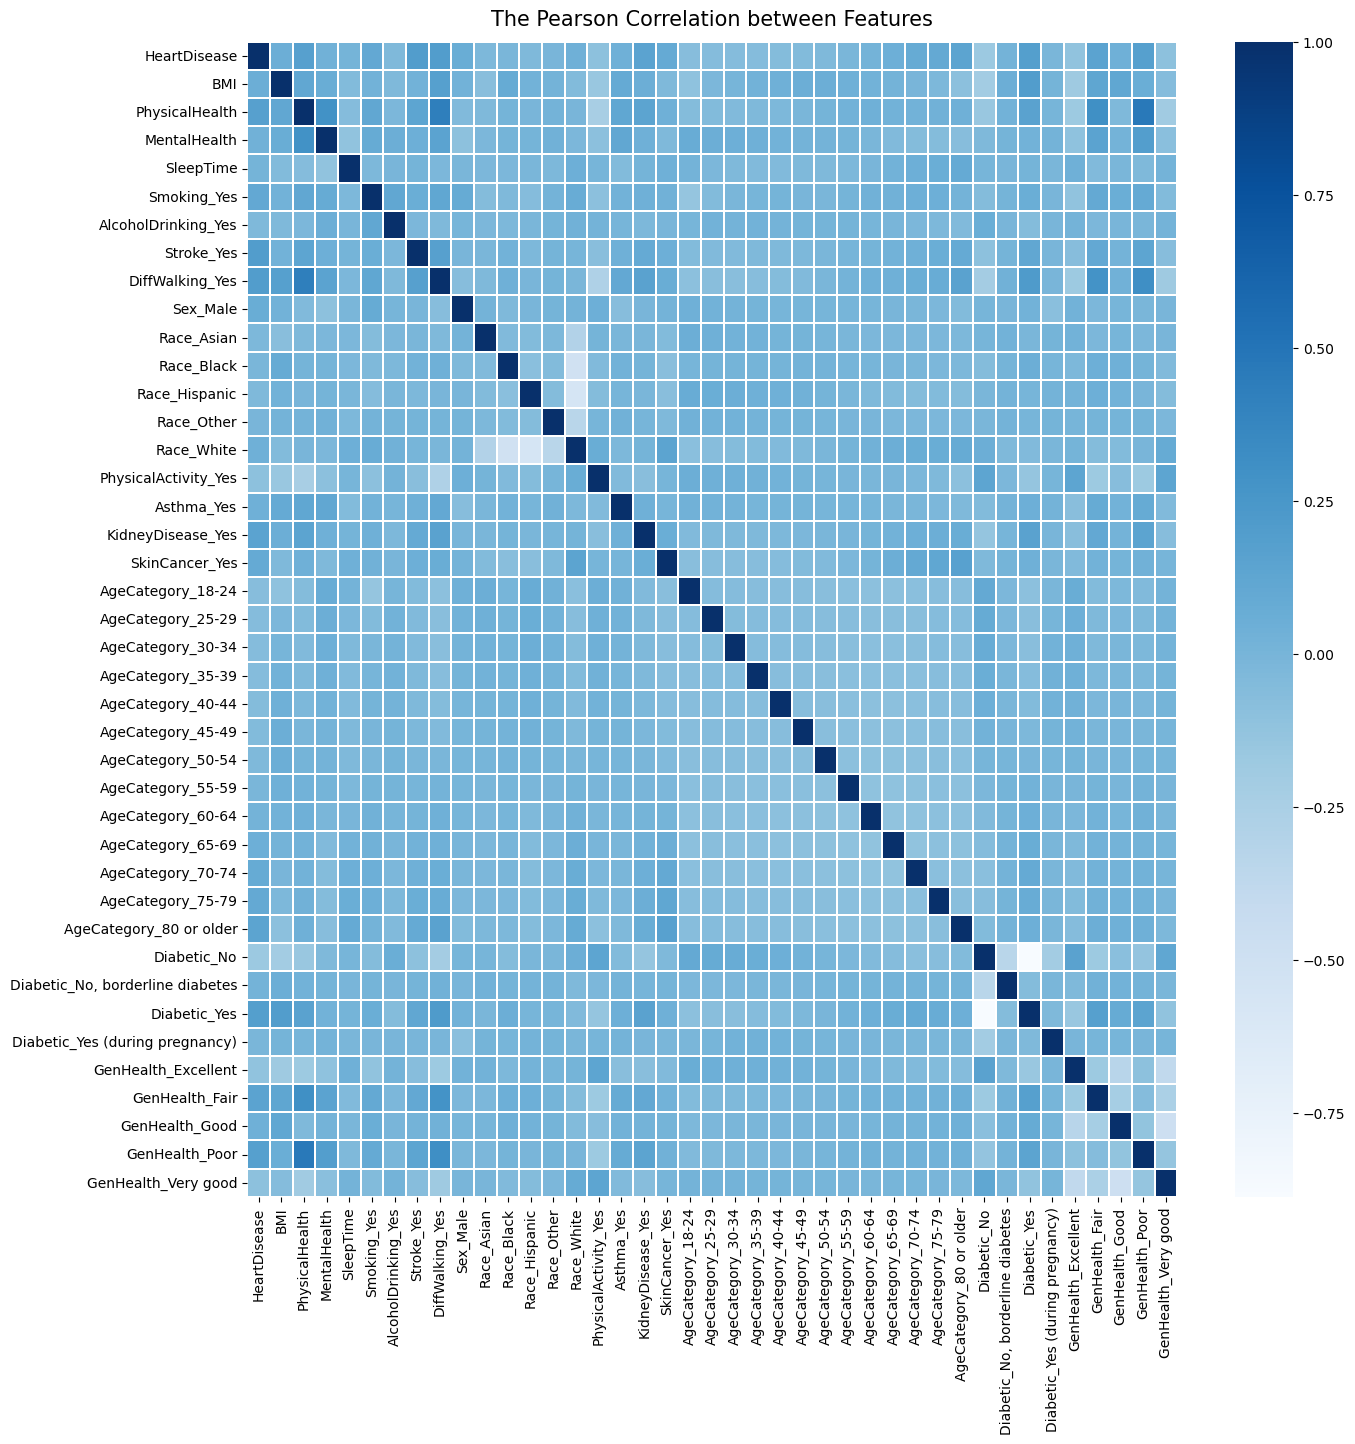

In [31]:
data_corr = heart_disease_df_dummy.corr()

corr_ft = plt.figure(figsize= (15, 15))
corr_ft = sns.heatmap(data_corr, linewidth= 0.1, cmap= "Blues")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)

plt.show()

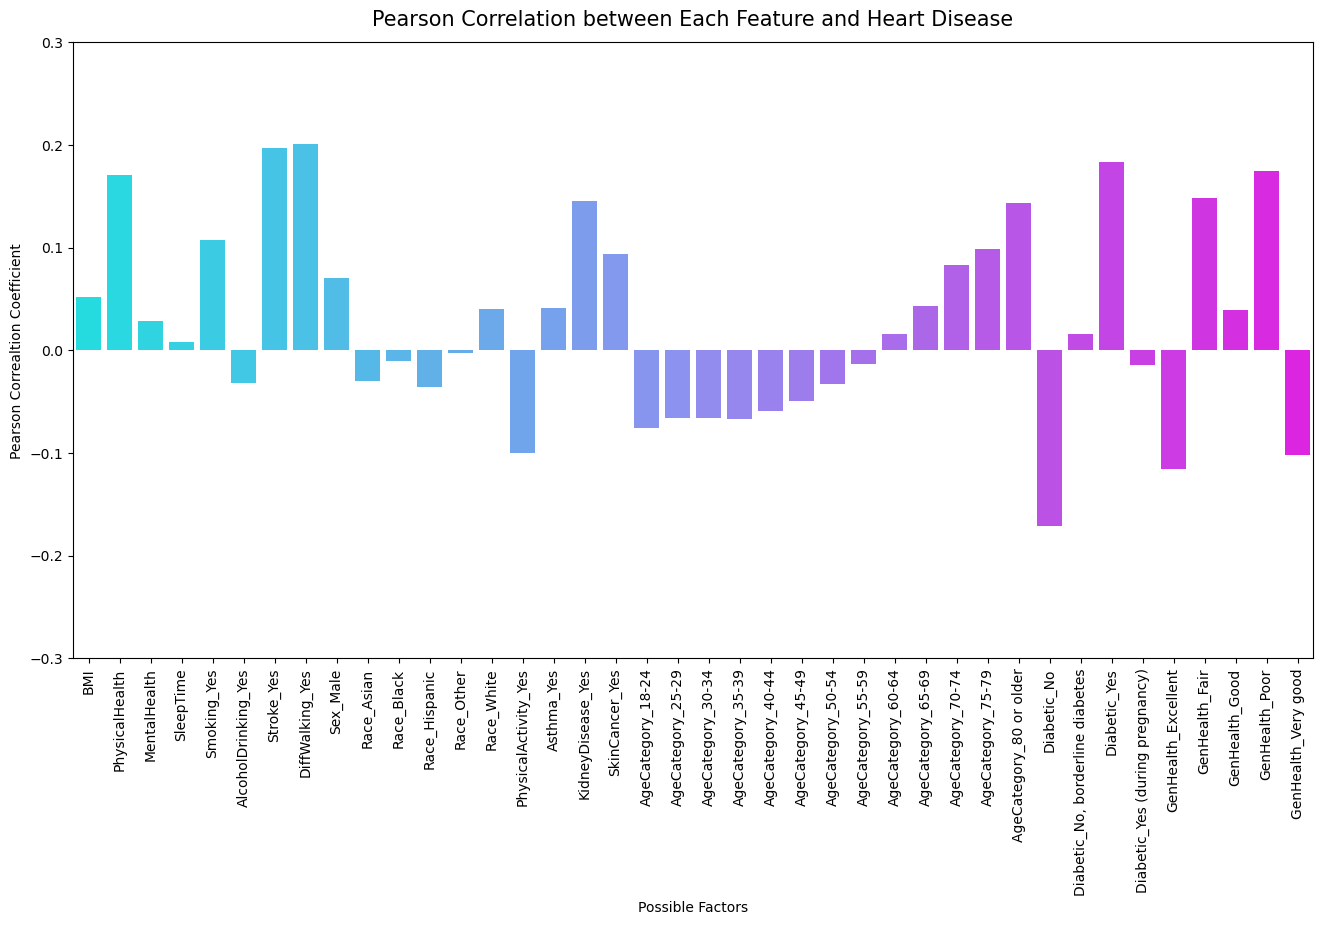

In [32]:
corr_ft_hd_x = list(data_corr.columns)
del corr_ft_hd_x[0]
corr_ft_hd_y = list(data_corr["HeartDisease"])
del corr_ft_hd_y[0]

corr_ft_hd = plt.figure(figsize= (16, 8))
corr_ft_hd = sns.barplot(x= corr_ft_hd_x, y= corr_ft_hd_y, palette= "cool")
corr_ft_hd.set_title("Pearson Correlation between Each Feature and Heart Disease",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Possible Factors",
               ylabel= "Pearson Correaltion Coefficient",
               ylim= (-0.3, 0.3))
corr_ft_hd.set_xticklabels(corr_ft_hd_x, rotation= "vertical")

plt.show()